In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
reds = plt.get_cmap('Reds_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_r = cmx.ScalarMappable(norm=cNorm, cmap=reds)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.marker": "o",
    "lines.markersize": 8,
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [2]:
data = {}
bl_data = {}
corr_data = {}
for folder in os.listdir():
    if folder == "8_qubits_delta=0.0":
        fol = "8_qubits_delta=0.0/more_samples"
        print(fol)
    else:
        fol = folder
    if "ipynb" not in folder and ".pdf" not in folder and folder != "8_qubits_delta=-2.0":
        data[folder] = {}
        data[folder]["SxSx"] = pd.read_csv(fol + "/SxSx.csv")
        data[folder]["SySy"] = pd.read_csv(fol + "/SySy.csv")
        data[folder]["SzSz"] = pd.read_csv(fol + "/SzSz.csv")
        
        bl_data[folder] = {}
        bl_data[folder]["SxSx"] = pd.read_csv(fol + "/baseline_SxSx.csv")
        bl_data[folder]["SySy"] = pd.read_csv(fol + "/baseline_SySy.csv")
        bl_data[folder]["SzSz"] = pd.read_csv(fol + "/baseline_SzSz.csv")
        
        corr_data[folder] = {}
        with open(folder+'/target_sxsx.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SxSx"] = sum([float(item.split("\n")[0]) for item in lines])
        with open(folder+'/target_sysy.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SySy"] = sum([float(item.split("\n")[0]) for item in lines])
        with open(folder+'/target_szsz.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SzSz"] = sum([float(item.split("\n")[0]) for item in lines])
        
        with open(fol + '/all_bases.txt') as f:
            lines = f.readlines()
        data[folder]["bases"] = lines

8_qubits_delta=0.0/more_samples


In [3]:

for folder in data.keys():
    print(folder)
    print(len(set(data[folder]["bases"])))

8_qubits_delta=-0.2
6
8_qubits_delta=-1.0
5
8_qubits_delta=0.0
8
8_qubits_delta=0.2
5
8_qubits_delta=0.5
7
8_qubits_delta=1.0
4
8_qubits_delta=5.0
11


In [4]:
corr_d = {}
d = {}
d_std = {}
bl_d = {}
bl_d_std = {}
folders = [float(item.split("=")[1]) for item in corr_data.keys()]
folders.sort()
for k, key in enumerate(["SxSx", "SySy", "SzSz"]):
    corr_d[key] = []
    d[key] = []
    d_std[key] = []
    bl_d[key] = []
    bl_d_std[key] = []
    for folder in folders:
        folder = "8_qubits_delta="+str(folder)
        corr_d[key].append(np.abs(corr_data[folder][key]))
        d[key].append(np.abs(np.mean(data[folder][key].iloc[-1,1:])))
        d_std[key].append(np.std(data[folder][key].iloc[-1,1:]))
        bl_d[key].append(np.abs(np.mean(bl_data[folder][key].iloc[-1,1:])))
        bl_d_std[key].append(np.std(bl_data[folder][key].iloc[-1,1:]))

print(folders)

[-1.0, -0.2, 0.0, 0.2, 0.5, 1.0, 5.0]


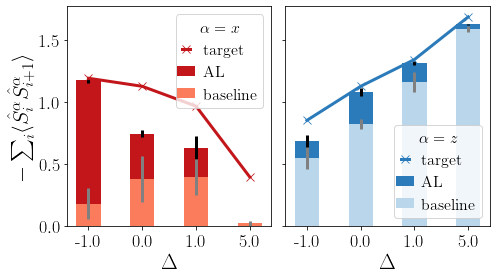

In [5]:
delta_values = [0,2,5,6]

fig, ax = plt.subplots(1,2, figsize=(7,4), sharey=True, sharex=True)
colors = [scalarMap_r, scalarMap]
for k, key in enumerate(["SxSx", "SzSz"]):
    ax[k].plot(range(len(delta_values)), [corr_d[key][i] for i in delta_values], color = colors[k].to_rgba(values[2]), marker = "x")
    for index, i in enumerate(delta_values):    
        ax[k].bar(index, d[key][i], yerr=d_std[key][i], color = colors[k].to_rgba(values[2]), width = 0.45)
        ax[k].bar(index, bl_d[key][i], yerr=bl_d_std[key][i], color = colors[k].to_rgba(values[5]), ecolor = "grey",width = 0.45)
    ax[k].set_xlabel("$\Delta$")
    ax[k].plot([],[],color = colors[k].to_rgba(values[2]), marker="x", label = "target")
    ax[k].plot([],[],color = colors[k].to_rgba(values[2]), linewidth = 10, markersize=0, label = "AL")
    ax[k].plot([],[],color = colors[k].to_rgba(values[5]), linewidth = 10, markersize=0, label = "baseline")
ax[0].legend(fontsize=16, title=r"$\alpha=x$", handlelength=0.5, title_fontsize=16)
ax[1].legend(fontsize=16, title=r"$\alpha=z$", handlelength=0.5, title_fontsize=16, loc="lower right")
plt.xticks([i for i in range(len(delta_values))],[folders[i] for i in delta_values])
ax[0].set_ylabel(r"$-\sum_i \langle \hat{S}_i^\alpha \hat{S}_{i+1}^\alpha \rangle $")
fig.tight_layout()
plt.savefig("Heisenberg_summary.pdf")

As a second example, we use our AL-QST scheme to reconstruct ground states of the Heisenberg Hamiltonian

$$
\hat{\mathcal{H}} = \sum_{\langle i,j\rangle} J (\hat{S}_i^x \hat{S}_j^x+\hat{S}_i^y\hat{S}_j^y)+(J+\Delta)\hat{S}i^z\hat{S}_j^z\,,
\label{eq:Heisenberg}
$$
where $\hat{S}_{i(j)}^{\mu}$ denote the $\mu\in \{x,y,z\}$ component of the spin-1/2 operator at site $i(j) =1,\dots ,L $. This model will encloses groundstates with a strong polarization in $z$ direction for large $\Delta$ to a vanishing polarization in this direction for $\Delta=-J$. For $\Delta=0$ the ground states are SU(2) invariant. In what follows we will compute the ground states of Eq.~\eqref{eq:Heisenberg} using a matrix product state representation with the SyTen package [....].


This improvement is achieved by requesting samples from only two additional measurement configurations. \\

For the GHZ state with phase structure the AL-QST scheme also requests additional measurements in 2 (5) additional measurement configurations for states generated with the classical simulator (real quantum device). In contrast to the GHZ state without phase structure, these configurations capture much more additional information for these states, namely the phase difference of $\ket{0\dots0}$ and $\ket{1\dots1}$. Our scheme is able to capture the importance of measurements from other configurations than the reference configuration and requests many of the configurations several times until the the learning is stopped after 7 (25) queries. The AL-QST scheme improves the reconstruction results to a fidelity of $f^{1/N}=95.0\pm 1.5\,\%$ ($87.5\pm4.3\,\%$) compared to $75\pm11\,\%$ ($61\pm 13\,\%$) for additional measurements from randomly selected configurations. The learning curves for states generated with the classical simulator and on a real quantum device are shown in Figures ... and ... . In both cases it can be seen that adding samples which contain more information on the phase structure can confuse the learner at first place (see epochs $1000$ to $2000$ in both figures), but when enough information on the phase is added, the reconstruction improves again. For the state generated with the classical simulator (see Fig. ...) this happens by adding samples from the $XZZXX$ and $XYYYX$ configurations. For the states generated on the real devices five additional measurement configurations are needed.


In figure ... the reconstruction results for the Heisenberg states with different $\Delta=-1,0,1,5$ are presented. Here, we focus on the reconstruction of the correlator $\langle S_i^\alpha S_{i+1}^{\alpha}\rangle$ for nearest neighbors and sum over all sites $i=1,\dots , L-1$. The learning is stopped when $\vert \langle S_i^\alpha S_{i+1}^{\alpha}\rangle \vert $ is at least 2/3 of the target value and the correct sign is obtained. It can be seen that for $\Delta=-1,0,1$ the AL-QST scheme performs significantly better than the baseline, and for $\Delta=5$ equally well. It has to be stressed that the RBM representation in general has difficulties with reconstructing the correct phase for SU(2) invariant systems like the $\Delta=0$ Heisenberg state, as can be seen e.g. also in Ref. [TORLAI]. This leads to a better reconstruction of quantities measured in the reference direction compared to the orthogonal directions, e.g. the reconstruction for $\Delta=0$ has $\langle S_i^z S_{i+1}^{z}\rangle_{\mathrm{reconstr.}} >  $.  
In figure ... the reconstruction results for the Heisenberg states with different $\Delta=-1,0,1,5$ are presented. Here, we focus on the reconstruction of the correlator $\langle S_i^\alpha S_{i+1}^{\alpha}\rangle$ for nearest neighbors and sum over all sites $i=1,\dots ,L-1$. The learning is stopped when $\vert \langle S_i^\alpha S_{i+1}^{\alpha}\rangle \vert $ is at least 2/3 of the target value and the correct sign is obtained. It can be seen that for $\Delta=-1,0,1$ the AL-QST scheme performs significantly better than the baseline, and for $\Delta=5$ equally well. It has to be stressed that the RBM representation in general has difficulties with reconstructing the correct phase for SU(2) invariant systems like the $\Delta=0$ Heisenberg state, as can be seen e.g. also in Ref. [TORLAI]. This leads to a better reconstruction of quantities measured in the reference direction compared to the orthogonal directions, e.g. the reconstruction for $\Delta=0$ has $-\langle S_i^z S_{i+1}^{z}\rangle_{\mathrm{reconstr.}} >-\langle S_i^x S_{i+1}^{x}\rangle_{\mathrm{reconstr.}} $ and $-\langle S_i^z S_{i+1}^{z}\rangle_{\mathrm{reconstr.}} >-\langle S_i^y S_{i+1}^{y}\rangle_{\mathrm{reconstr.}}$ with $\langle S_i^z S_{i+1}^{z}\rangle_{\mathrm{reconstr.}}$ being closer to the actual value than $\langle S_i^y S_{i+1}^{y}\rangle_{\mathrm{reconstr.}}$ and $\langle S_i^x S_{i+1}^{x}\rangle_{\mathrm{reconstr.}}$. A similar tendency can be observed for small $\Delta$ like $\Delta=-1,1$.

For $\Delta=-1$ the state has a small polarization in $z$ direction compared to $x$ and $y$ directions. Our AL-QST scheme is able to capture this by selecting the $xx\dots x$ configuration as the reference configuration and not the $zz\dotsz$ configuration. Consequently, as explained above, the reconstruction of the correlator in the reference direction $\langle S_i^x S_{i+1}^{x}\rangle_{\mathrm{reconstr.}}$ is better than e.g.  $\langle S_i^z S_{i+1}^{z}\rangle_{\mathrm{reconstr.}}$ due to the RBM representation. 


In [197]:
data = {}
bl_data = {}
corr_data = {}
for folder in os.listdir():
    if folder == "8_qubits_delta=0.0":
        f = "8_qubits_delta=0.0/more_samples"
        print(f)
    else:
        f = folder
    if folder != '.ipynb_checkpoints' and folder != 'LearningCurves.ipynb' and folder != 'Overview.ipynb' and folder != "8_qubits_delta=-2.0":
        data[folder] = {}
        data[folder]["SxSx"] = pd.read_csv(f + "/sxsx_full_data.csv",header=None).iloc[-4:,:]
        data[folder]["SySy"] = pd.read_csv(f + "/sysy_full_data.csv",header=None).iloc[-4:,:]
        data[folder]["SzSz"] = pd.read_csv(f + "/szsz_full_data.csv",header=None).iloc[-4:,:]

        bl_data[folder] = {}
        bl_data[folder]["SxSx"] = pd.read_csv(f + "/bl_sxsx_full_data.csv",header=None).iloc[-4:,:]
        bl_data[folder]["SySy"] = pd.read_csv(f + "/bl_sysy_full_data.csv",header=None).iloc[-4:,:]
        bl_data[folder]["SzSz"] = pd.read_csv(f + "/bl_szsz_full_data.csv",header=None).iloc[-4:,:]
        
        corr_data[folder] = {}
        with open(folder+'/target_sxsx.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SxSx"] = [4*float(item) for item in lines]
        with open(folder+'/target_sysy.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SySy"] = [4*float(item) for item in lines]
        with open(folder+'/target_szsz.txt') as f:
            lines = f.readlines()
        corr_data[folder]["SzSz"] = [4*float(item) for item in lines]
print(corr_data["8_qubits_delta=0.0"]["SxSx"])
print(list(np.mean(data["8_qubits_delta=0.0"]["SxSx"], axis = 0)))

8_qubits_delta=0.0/more_samples
[-0.8816508837262529, -0.3790272190967644, -0.783139146140953, -0.4122756336655038, -0.7831391461142634, -0.3790272192335124, -0.8816508837730743]
[-0.6281525038336385, -0.2084337580510301, -0.5493271914112791, 0.014223401619337425, -0.7822879565564513, 0.11598529105013924, -0.8740958646033965]


In [199]:
index = 4

corr_d = {}
d = {}
d_std = {}
bl_d = {}
bl_d_std = {}
folders = [float(item.split("=")[1]) for item in corr_data.keys()]
folders.sort()
for k, key in enumerate(["SxSx", "SySy", "SzSz"]):
    corr_d[key] = []
    d[key] = []
    d_std[key] = []
    bl_d[key] = []
    bl_d_std[key] = []
    for folder in folders:
        folder = "8_qubits_delta="+str(folder)
        corr_d[key].append(corr_data[folder][key][index])
        d[key].append(np.mean(data[folder][key], axis = 0)[index])
        d_std[key].append(np.std(data[folder][key], axis = 0)[index])
        bl_d[key].append(np.mean(bl_data[folder][key], axis = 0)[index])
        bl_d_std[key].append(np.std(bl_data[folder][key], axis = 0)[index])
                            
print(folders)
print(corr_d)

[-1.0, -0.2, 0.0, 0.2, 0.5, 1.0, 5.0]
{'SxSx': [-0.7581053620756231, -0.7927938045435334, -0.7831391461142634, -0.76723491375391, -0.7332297823401334, -0.656874513664782, -0.2054064688940455], 'SySy': [-0.7581053620600007, -0.7927938042964435, -0.7831391460768438, -0.7672349137540738, -0.7332297823543787, -0.656937341080438, -0.20540646890514666], 'SzSz': [-0.5747237400131819, -0.7550080494538063, -0.7831391460809037, -0.80688235488108, -0.8361117468301837, -0.8727648198633711, -0.9740724269348519]}


Text(0, 0.5, '$\\langle S_4 S_5 \\rangle $')

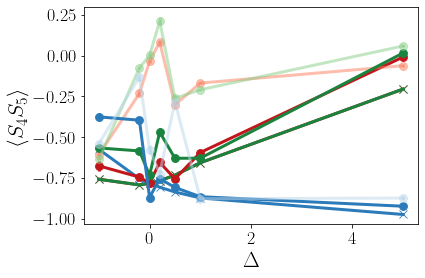

In [202]:
colors = [scalarMap_r, scalarMap_g, scalarMap]
for k, key in enumerate(["SxSx", "SySy", "SzSz"]):
    plt.plot(folders, corr_d[key], color = colors[k].to_rgba(values[2]), marker = "x")
    plt.errorbar(folders, d[key], d_std[key], color = colors[k].to_rgba(values[2]), marker = "o")
    plt.errorbar(folders, bl_d[key], bl_d_std[key], color = colors[k].to_rgba(values[5]), marker = "o", alpha = 0.5)
plt.xlabel("$\Delta$")
plt.ylabel(r"$\langle S_"+str(index)+" S_"+str(index+1)+r" \rangle $")